# Introduction📒
This project not only focus on classifying wine cultivars based on various attributes, providing valuable insights for the wine industry and enthusiasts alike but also in creating and solving a real-world scenario with missing data, simulating the complexities of working with incomplete information.

# Problem Statement❓
The problem at hand involves working with two wine datasets: 

**1st dataset (wine quality)** ➡️ consists of red and white variants of the Portuguese "Vinho Verde" wine, containing only physicochemical and sensory variables due to privacy and logistic issues. 

**2nd dataset (wine)** ➡️ comprises wines from different cultivars grown in the same region in Italy but has missing variables, leaving only a reduced version with 13 dimensions.

# Objective✨
To showcase the process of missing data analysis and data mining by merging the two wine datasets and to use that newly created dataset to build a classification model. However, few assumptions are to be made on the datasets

**Assumptions made**
1. In wine dataset, 3 different cultivars are from any white wine/red wine cultivars in wine quality dataset.
2. With 1st assumption, we treat the chemical compositions in wine quality dataset to be the lost 10 variables in wine dataset.
3. With 1st and 2nd assumption, we will be merging both dataset with the "primary key" alcohol% (mean of alcohol from both datasets) in an ascending order to each cultivars.

In [1]:
#Initialization
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import os
#os.getcwd()

In [2]:
#Data source
file_path = 'C:/Users/User/Machine Learning/Wine Dataset/winequalityN.csv'
data = pd.read_csv(file_path)
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#Data Definition
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
#Data Cleaning
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Exploratory Data Analysis (EDA)

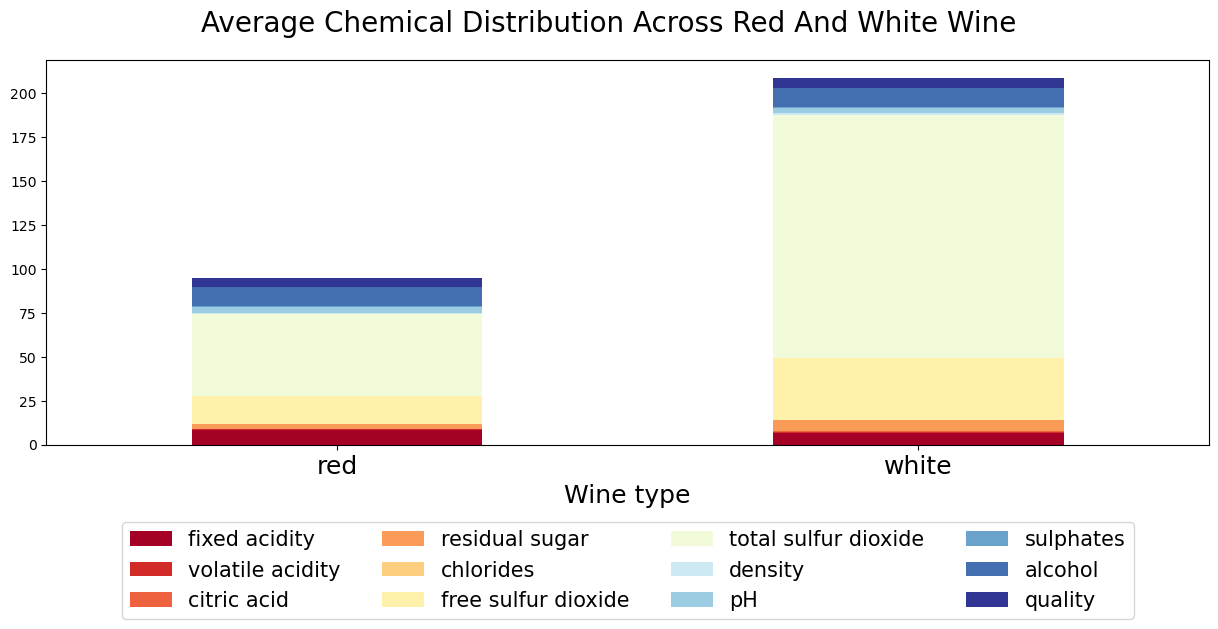

In [7]:
#Let's separate the bottles
white_wine = data.loc[(data["type"] == "white")]
red_wine = data.loc[(data["type"] == "red")]

#To see the average chemical distribution across both red wine and white wine
data.groupby(["type"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle(
    "Average Chemical Distribution Across Red And White Wine", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Wine type", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

[Text(0.5, 0, 'Wine Quality Rating'), Text(0, 0.5, 'Number of Bottles')]

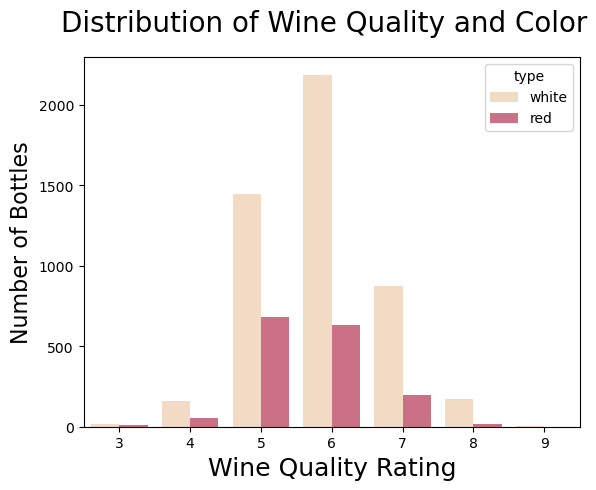

In [8]:
#Then graph the distribution so we see how may red vs white bottles we have
plt.rcParams["font.family"] = "sans-serif"
plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)

ax = sns.countplot(
    x="quality", hue="type", data=data, palette=["#f9dbbd", "#da627d"]
)
ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

In [9]:
#Evenly distributing the types of wines
display(white_wine)
row_count_white = white_wine.shape[0]
display(red_wine)
row_count_red = red_wine.shape[0]

#Take the smaller data sets
if row_count_white >= row_count_red:
    rows = row_count_red
else:
    rows = row_count_white

#Randomly taking data sets
white_wine = white_wine.sample(rows)
red_wine = red_wine.sample(rows)
display(white_wine)
display(red_wine)

#Join two separates df back to data
data = pd.concat([white_wine, red_wine])
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1860,white,6.7,0.18,0.19,4.7,0.046,57.0,161.0,0.99460,3.32,0.66,10.5,6
1877,white,8.0,0.20,0.36,1.2,0.032,21.0,78.0,0.99210,3.08,0.37,10.4,6
1285,white,7.8,0.16,0.41,1.7,0.026,29.0,140.0,0.99100,3.02,0.78,12.5,6
1617,white,6.2,0.20,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2,6
4157,white,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,white,6.4,0.14,0.28,7.9,0.057,21.0,82.0,0.99425,3.26,0.36,10.0,6
2551,white,6.3,0.26,0.42,7.1,0.045,62.0,209.0,0.99544,3.20,0.53,9.5,6
3258,white,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6
3731,white,7.0,0.34,0.26,10.3,0.041,51.0,166.0,0.99382,3.08,0.35,11.6,6


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5307,red,12.5,0.460,0.49,4.5,0.070,26.0,49.0,0.99810,3.05,0.57,9.6,4
5818,red,9.6,0.410,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.5,5
5652,red,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.1,6
6264,red,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5
5828,red,6.6,0.610,0.01,1.9,0.080,8.0,25.0,0.99746,3.69,0.73,10.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,red,7.3,0.695,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,9.2,5
6345,red,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
6222,red,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
5525,red,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1860,white,6.7,0.180,0.19,4.7,0.046,57.0,161.0,0.99460,3.32,0.66,10.5,6
1877,white,8.0,0.200,0.36,1.2,0.032,21.0,78.0,0.99210,3.08,0.37,10.4,6
1285,white,7.8,0.160,0.41,1.7,0.026,29.0,140.0,0.99100,3.02,0.78,12.5,6
1617,white,6.2,0.200,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2,6
4157,white,7.4,0.160,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,red,7.3,0.695,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,9.2,5
6345,red,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
6222,red,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
5525,red,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5


[Text(0.5, 0, 'Wine Quality Rating'), Text(0, 0.5, 'Number of Bottles')]

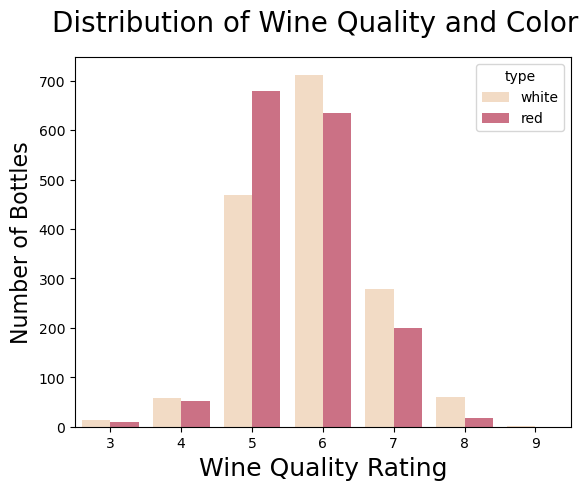

In [10]:
#Plot the evenly distributed red and white wines

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)

ax = sns.countplot(
    x="quality", hue="type", data=data, palette=["#f9dbbd", "#da627d"]
)
ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

C:\Users\User\AppData\Local\Temp\ipykernel_32292\3757888655.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  red_wine.groupby(["quality"]).mean().plot.bar(


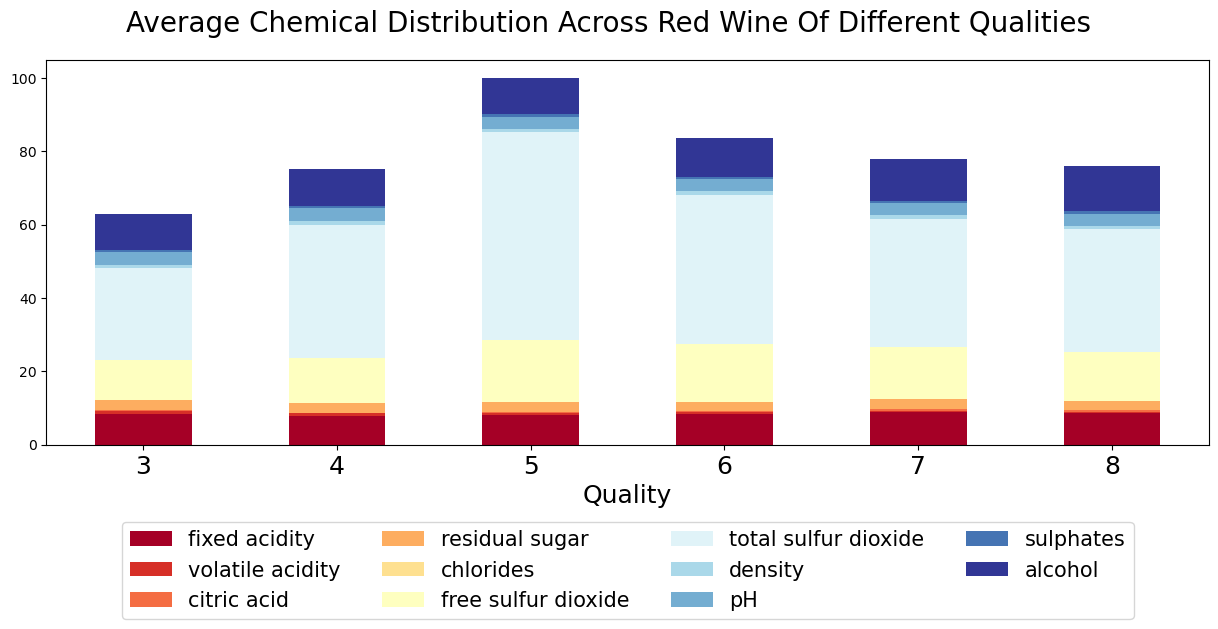

In [11]:
#Visualize chemical distribution in red wine

red_wine.groupby(["quality"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

C:\Users\User\AppData\Local\Temp\ipykernel_32292\3099874241.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  white_wine.groupby(["quality"]).mean().plot.bar(


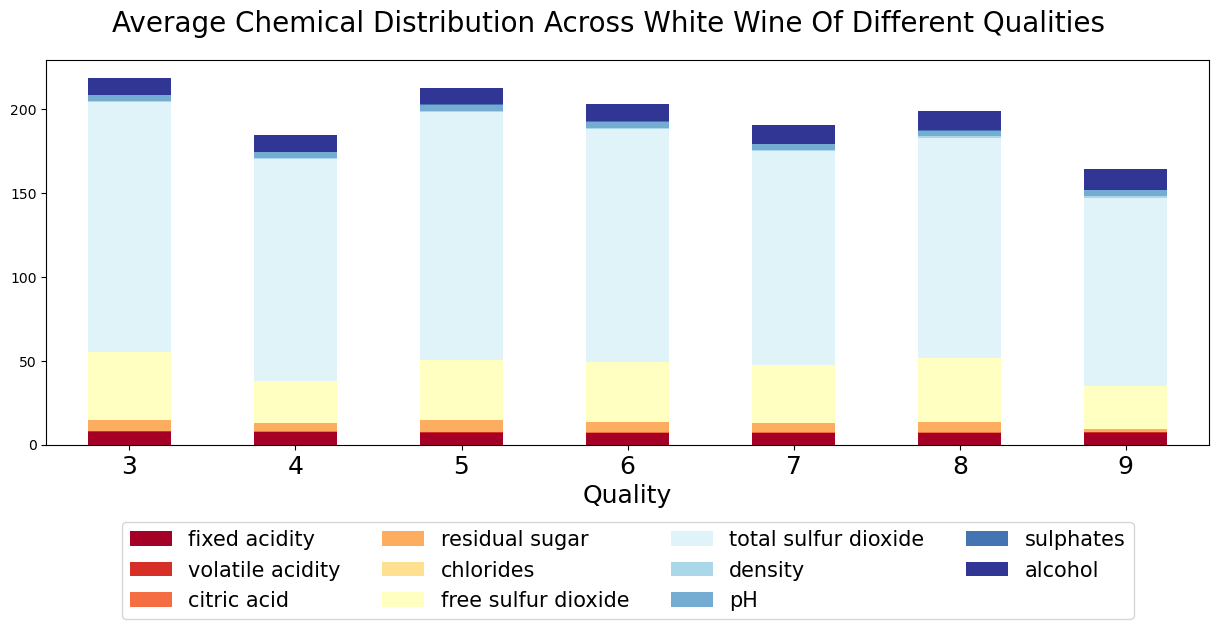

In [12]:
#Visualize chemical distribution in white wine

white_wine.groupby(["quality"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle(
    "Average Chemical Distribution Across White Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

In [13]:
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1860,white,6.7,0.180,0.19,4.7,0.046,57.0,161.0,0.99460,3.32,0.66,10.5,6
1877,white,8.0,0.200,0.36,1.2,0.032,21.0,78.0,0.99210,3.08,0.37,10.4,6
1285,white,7.8,0.160,0.41,1.7,0.026,29.0,140.0,0.99100,3.02,0.78,12.5,6
1617,white,6.2,0.200,0.49,1.6,0.065,17.0,143.0,0.99370,3.22,0.52,9.2,6
4157,white,7.4,0.160,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,red,7.3,0.695,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,9.2,5
6345,red,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
6222,red,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
5525,red,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5


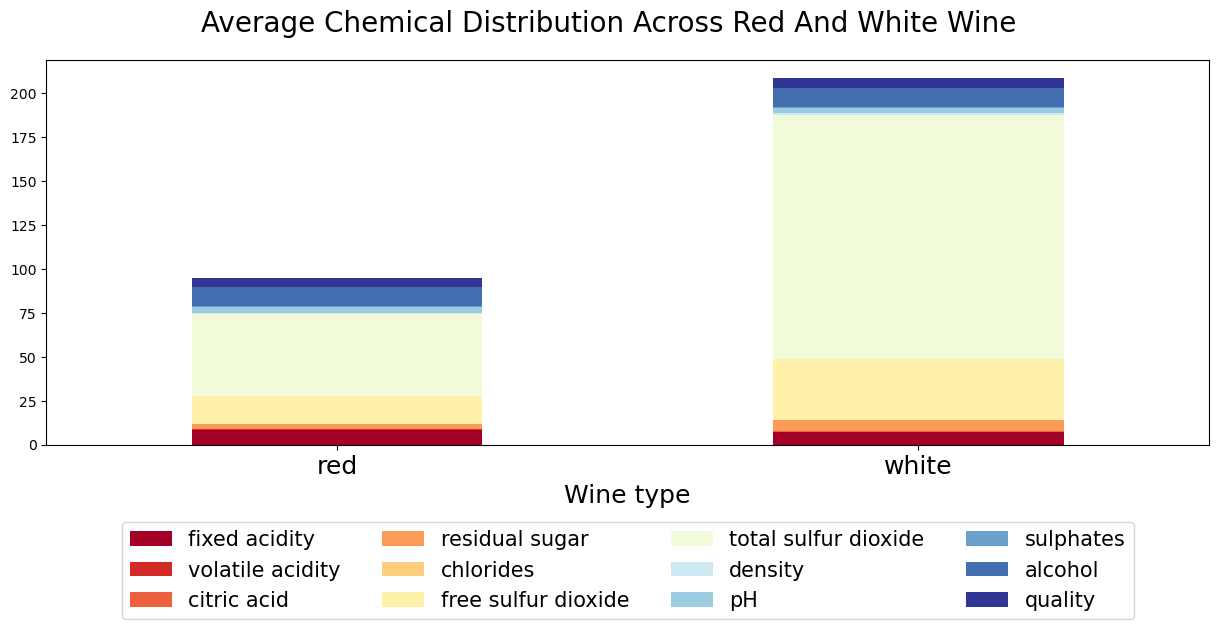

In [14]:
#To see average chemical distribution across both red wine and white wine
data.groupby(["type"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle(
    "Average Chemical Distribution Across Red And White Wine", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Wine type", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)

C:\Users\User\AppData\Local\Temp\ipykernel_32292\81987375.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = red_wine.corr()


Text(0.5, 1.0, 'Correlations Between Compounds In Red Wine')

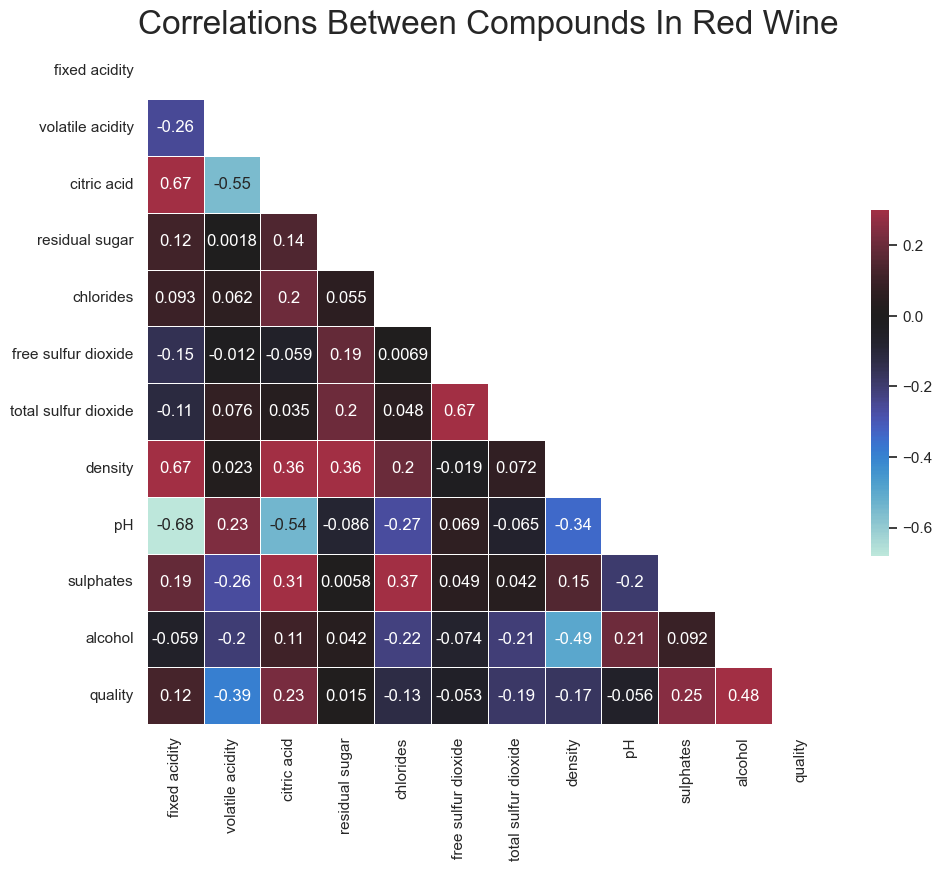

In [15]:
#Verify the correlation between red wine
sns.set_theme(style="white")

corr = red_wine.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="icefire",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In Red Wine", size=24)

C:\Users\User\AppData\Local\Temp\ipykernel_32292\2304800800.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = white_wine.corr()


Text(0.5, 1.0, 'Correlations Between Compounds In White Wine')

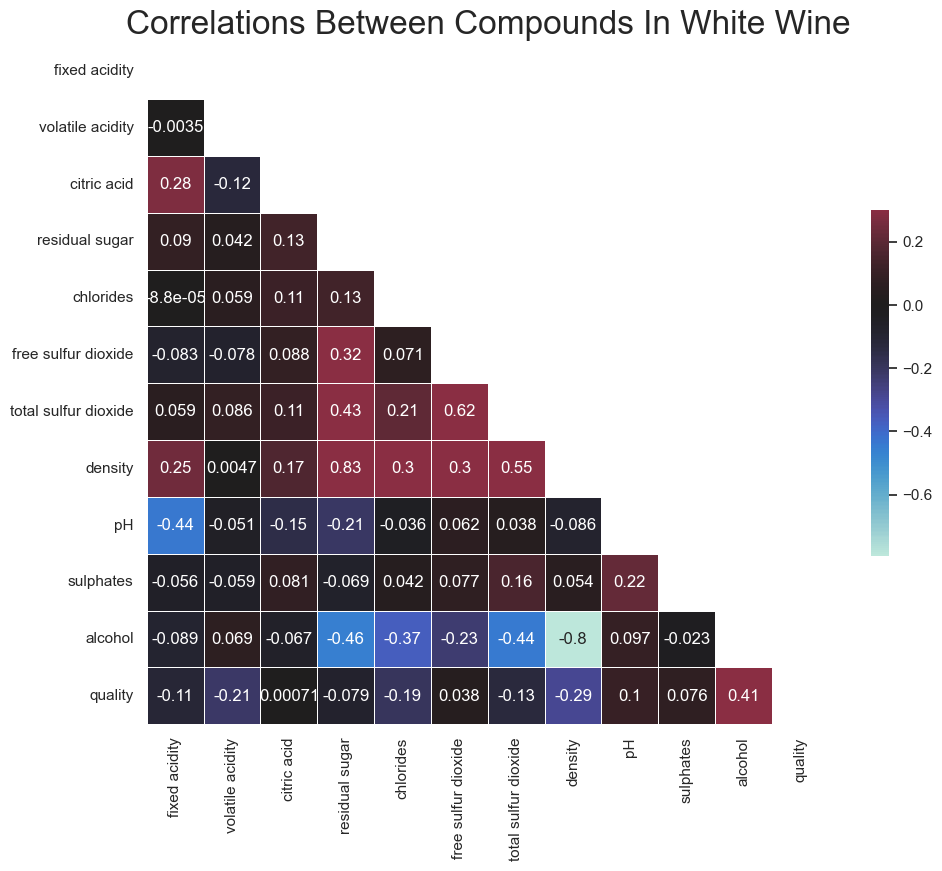

In [16]:
#Verify the correlation between white wine
sns.set_theme(style="white")

corr = white_wine.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="icefire",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In White Wine", size=24)

In [17]:
#Get 2nd data source
file_path1 = 'C:/Users/User/Machine Learning/Wine Dataset/wine.csv'
data1 = pd.read_csv(file_path1)
data1_size = data1.shape[0]
print(data1.shape)
data1.head(5)

(178, 14)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data Handling for Wine Dataset

In [18]:
#Get the distribution of each wine cultivars
print(data1['Wine'].unique())
cul1 = data1[data1['Wine'] == 1]
cul1 = cul1.sort_values(by = 'Alcohol', ascending = True)
cul1 = cul1.reset_index(drop = True)
cul2 = data1[data1['Wine'] == 2]
cul2 = cul2.sort_values(by = 'Alcohol', ascending = True)
cul2 = cul2.reset_index(drop = True)
cul3 = data1[data1['Wine'] == 3]
cul3 = cul3.sort_values(by = 'Alcohol', ascending = True)
cul3 = cul3.reset_index(drop = True)
print("Cultivar 1:", cul1.shape[0])
print("Cultivar 2:", cul2.shape[0])
print("Cultivar 3:", cul3.shape[0])

[1 2 3]
Cultivar 1: 59
Cultivar 2: 71
Cultivar 3: 48


In [19]:
#Restrict the size of data as data1
data = data.sample(data1_size)
data.head(5)

#Reset the index of data
data = data.reset_index(drop = True)

#Cannot directly join because each customer segment isn't based on the alcohol%
#Segment into each wine cultivars in data for data1
data_cl1 = data.iloc[0:cul1.shape[0]]
data_cl1 = data_cl1.sort_values(by = 'alcohol', ascending = True)
data_cl1 = data_cl1.reset_index(drop = True)
a = cul1.shape[0]
data_cl2 = data.iloc[a : (a + cul2.shape[0])]
data_cl2 = data_cl2.sort_values(by = 'alcohol', ascending = True)
data_cl2 = data_cl2.reset_index(drop = True)
b = a + cul2.shape[0]
data_cl3 = data.iloc[b : (b + cul3.shape[0])]
data_cl3 = data_cl3.sort_values(by = 'alcohol', ascending = True)
data_cl3 = data_cl3.reset_index(drop = True)

In [20]:
#Wine dataset
print("Wine dataset alcohol information: ")
print(cul1['Alcohol'].max(), cul1['Alcohol'].min())

#Wine quality dataset
print("Wine_quality dataset alcohol information: ")
print(data_cl1['alcohol'].max(), data_cl1['alcohol'].min())

Wine dataset alcohol information: 
14.83 12.85
Wine_quality dataset alcohol information: 
13.05 8.8


In [21]:
cul3.tail(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
38,3,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,4.40,0.91,2.05,550
39,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680
40,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
41,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520
42,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
43,3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480
44,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415
45,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560
46,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
47,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


In [22]:
data_cl3.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,white,14.2,0.270,0.49,1.1,0.037,33.0,156.0,0.99200,3.15,0.54,11.1,6
39,white,6.0,0.140,0.37,1.2,0.032,63.0,148.0,0.99185,3.32,0.44,11.2,5
40,red,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
41,red,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
42,white,7.6,0.190,0.41,1.1,0.040,38.0,143.0,0.99070,2.92,0.42,11.4,5
43,white,6.7,0.410,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,6
44,white,7.0,0.240,0.30,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,11.8,6
45,red,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
46,red,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
47,white,8.0,0.340,0.25,6.4,0.035,38.0,103.0,0.99148,2.91,0.23,12.2,6


In [23]:
#Merge both datasets
merged_cl1 = pd.concat([cul1, data_cl1], axis = 1)
merged_cl2 = pd.concat([cul2, data_cl2], axis = 1)
merged_cl3 = pd.concat([cul3, data_cl3], axis = 1)
newData = pd.concat([merged_cl1, merged_cl2, merged_cl3])
newData = newData.reset_index(drop = True)
newData.tail(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,...,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
168,3,13.62,4.95,2.35,20.0,92,2.00,0.80,0.47,1.02,...,0.49,1.1,0.037,33.0,156.0,0.99200,3.15,0.54,11.1,6
169,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,...,0.37,1.2,0.032,63.0,148.0,0.99185,3.32,0.44,11.2,5
170,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,...,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
171,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,...,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
172,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,...,0.41,1.1,0.040,38.0,143.0,0.99070,2.92,0.42,11.4,5
173,3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,...,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,11.7,6
174,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,...,0.30,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,11.8,6
175,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,...,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
176,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,...,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
177,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,...,0.25,6.4,0.035,38.0,103.0,0.99148,2.91,0.23,12.2,6


In [24]:
#Replace both alcohol values with mean value for new dataset
print("Alcohol% in new dataset: ")
print(newData['Alcohol'].max(), newData['Alcohol'].min())
print(newData['alcohol'].max(), newData['alcohol'].min())
newData['Alcohol%'] = (newData['Alcohol'] + newData['alcohol'])/2
newData = newData.drop(columns = ['Alcohol', 'alcohol'])
newData.head(5)

Alcohol% in new dataset: 
14.83 11.03
13.05 8.8


,Wine,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,...,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,Alcohol%
0,1,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,...,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,5,10.825
1,1,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,...,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,5,10.865
2,1,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,...,0.49,7.6,0.052,67.0,226.0,0.99560,3.16,0.47,5,10.975
3,1,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,...,0.41,1.1,0.060,36.0,104.0,0.99317,2.99,0.39,5,11.125
4,1,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,...,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,5,11.125


# Data Preparation for Model Training

In [25]:
#Shuffle data
from sklearn.utils import shuffle

#One hot encoding
newData = pd.get_dummies(newData, drop_first = True)
cols = list(newData)
cols.insert(0, cols.pop(cols.index('type_white'))) # 1 = white wine, 0 = red wine
newData = newData.loc[:, cols]
newData.rename({'type_white' : 'wine type'}, axis = 'columns', inplace = True)
newData.rename({'Wine' : 'Cultivars'}, axis = 'columns', inplace = True)
output = newData.pop('Cultivars')
newData.insert(newData.shape[1], 'Cultivars', output)
newData

,wine type,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,...,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,Alcohol%,Cultivars
0,1,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,...,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,5,10.825,1
1,1,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,...,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,5,10.865,1
2,1,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,...,7.6,0.052,67.0,226.0,0.99560,3.16,0.47,5,10.975,1
3,1,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,...,1.1,0.060,36.0,104.0,0.99317,2.99,0.39,5,11.125,1
4,0,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,...,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,5,11.125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,...,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,6,12.770,3
174,1,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,...,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,6,12.840,3
175,0,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,...,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,5,13.015,3
176,0,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,...,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,13.180,3


In [26]:
# Separate feature variables and target variable
X = newData.drop(['Cultivars'], axis = 1)
Y = newData['Cultivars']

In [27]:
X

,wine type,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,...,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,Alcohol%
0,1,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,...,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,5,10.825
1,1,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,...,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,5,10.865
2,1,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,...,0.49,7.6,0.052,67.0,226.0,0.99560,3.16,0.47,5,10.975
3,1,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,...,0.41,1.1,0.060,36.0,104.0,0.99317,2.99,0.39,5,11.125
4,0,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,...,0.00,2.5,0.075,3.0,13.0,0.99800,3.49,0.52,5,11.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,...,0.27,2.6,0.033,25.0,85.0,0.99086,3.05,0.34,6,12.770
174,1,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,...,0.30,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,6,12.840
175,0,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,...,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,5,13.015
176,0,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,...,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,13.180


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Cultivars, Length: 178, dtype: int64

In [29]:
#Data Normalization
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)
X

array([[ 0.91381155, -0.66099274,  0.56103322, ..., -1.07880492,
        -0.92938306, -1.09345533],
       [ 0.91381155,  1.31386618,  1.03622754, ..., -0.46919452,
        -0.92938306, -1.04542843],
       [ 0.91381155, -0.61610959,  0.67069345, ..., -0.52461365,
        -0.92938306, -0.91335443],
       ...,
       [-1.09431753,  1.58316512,  1.36520822, ..., -0.35835627,
        -0.92938306,  1.5360179 ],
       [-1.09431753,  0.15588072,  0.41481959, ...,  0.30667326,
         0.24388066,  1.73412889],
       [ 0.91381155, -0.58917969,  1.21899459, ..., -1.85467271,
         0.24388066,  1.84218944]])

In [30]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=0)

In [31]:
#Splitted data dimension
X_train.shape, Y_train.shape

((133, 25), (133,))

In [32]:
X_test.shape, Y_test.shape

((45, 25), (45,))

In [33]:
#Data Modelling
#Apply PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [34]:
#Data Modelling
#Using Logistic Regression Model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
Lmodel = linear_model.LogisticRegression(random_state = 0)
Lmodel.fit(X_train, Y_train)
Y_predL = Lmodel.predict(X_test)

#Print Linear Regression Model's Performance Summary
print('Coefficients:', Lmodel.coef_)
print('Intercept:', Lmodel.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_predL))
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_predL))

Coefficients: [[ 1.30113038  0.21018448 -0.72629602  0.06769451 -0.38525808]
 [ 0.3287546   0.38648742  1.46329661  0.21676442  0.12524117]
 [-1.62988498 -0.5966719  -0.73700059 -0.28445892  0.26001691]]
Intercept: [ 0.41787499  0.96783918 -1.38571417]
Mean squared error (MSE): 0.16
Coefficient of determination (R^2): 0.69


In [35]:
Y_test_plot = np.zeros(shape=Y_test.size, dtype = int)
for i in range(Y_test.size):
    Y_test_plot[i] = Y_test.iloc[i]
Y_test_plot

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [36]:
Y_test, Y_predL

(54     1
 151    3
 63     2
 55     1
 123    2
 121    2
 7      1
 160    3
 106    2
 90     2
 141    3
 146    3
 5      1
 98     2
 168    3
 80     2
 33     1
 18     1
 61     2
 51     1
 66     2
 37     1
 4      1
 104    2
 60     2
 111    2
 126    2
 86     2
 112    2
 164    3
 26     1
 56     1
 129    2
 45     1
 8      1
 44     1
 161    3
 92     2
 94     2
 174    3
 24     1
 30     1
 93     2
 101    2
 113    2
 Name: Cultivars, dtype: int64,
 array([1, 3, 1, 1, 2, 1, 1, 3, 2, 2, 3, 2, 1, 1, 3, 2, 1, 1, 2, 1, 2, 1,
        1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 2, 1, 2, 1,
        2], dtype=int64))

# Results & Findings

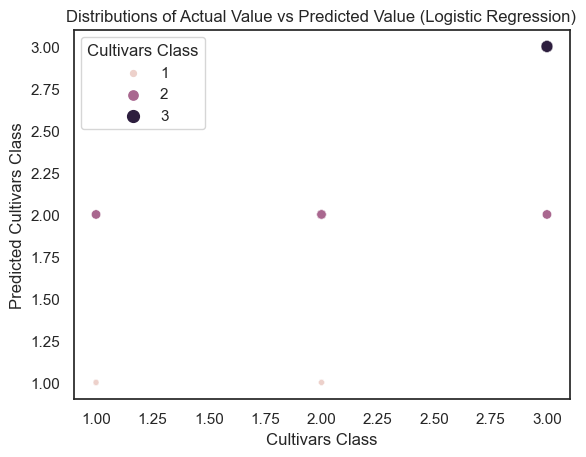

In [37]:
#Data Visualization On Logistic Regression Model's Performance
sp = sns.scatterplot(x = Y_test, y = Y_predL, hue = Y_predL, size = Y_predL, legend = True)
sp.set(title = 'Distributions of Actual Value vs Predicted Value (Logistic Regression)', xlabel = 'Cultivars Class', ylabel = 'Predicted Cultivars Class')
sp.legend(title = 'Cultivars Class')

[Text(0.5, 1.0, 'Distributions Of Predicted Value'),
 Text(0.5, 0, 'Cultivars Class'),
 Text(0, 0.5, 'Predicted Cultivars Class')]

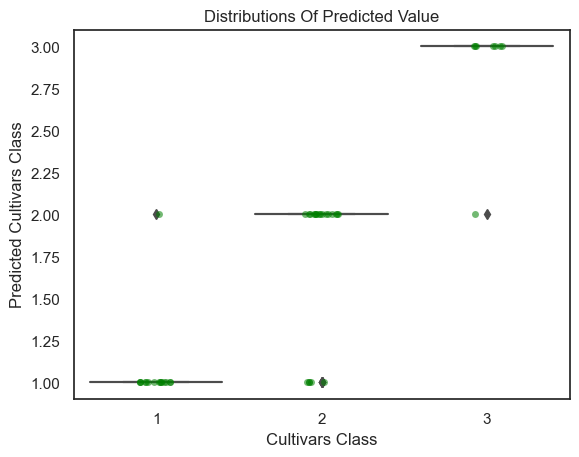

In [38]:
bp = sns.boxplot(x = Y_test, y = Y_predL)
bp = sns.stripplot(x = Y_test, y = Y_predL, jitter = True, marker = 'o', alpha = 0.55, color = "green")
bp.set(title = 'Distributions Of Predicted Value', xlabel = 'Cultivars Class', ylabel = 'Predicted Cultivars Class')

In [39]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_predL)
print(cm)
print("Model's accuracy(%): ", (accuracy_score(Y_test,Y_predL) * 100))

[[15  1  0]
 [ 5 16  0]
 [ 0  1  7]]
Model's accuracy(%):  84.44444444444444


In [40]:
#Data Modelling
#Using Random Forest Model

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier(random_state=1)
Rmodel.fit(X_train, Y_train)
Y_predR = Rmodel.predict(X_test)
target_names = ['Cultivars 1', 'Cultivars 2', 'Cultivars 3']
print(classification_report(Y_test, Y_predR, target_names=target_names))

              precision    recall  f1-score   support

 Cultivars 1       0.71      0.75      0.73        16
 Cultivars 2       0.70      0.67      0.68        21
 Cultivars 3       0.75      0.75      0.75         8

    accuracy                           0.71        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.71      0.71      0.71        45



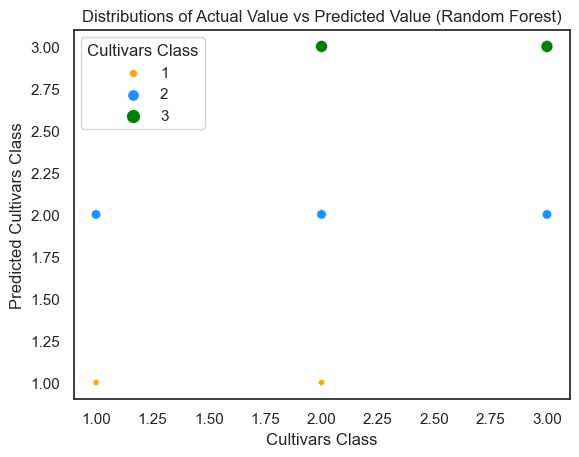

In [41]:
#Data Visualization On Random Forest Model's Performance
sp = sns.scatterplot(x = Y_test, y = Y_predR, hue = Y_predR, palette = ['orange', 'dodgerblue', 'green'], size = Y_predR, legend = True)
sp.set(title = 'Distributions of Actual Value vs Predicted Value (Random Forest)', xlabel = 'Cultivars Class', ylabel = 'Predicted Cultivars Class')
sp.legend(title = 'Cultivars Class')

In [42]:
results = {'predicted_values': Y_predR, 'original_values': Y_test}
results = pd.DataFrame(results)
results

,predicted_values,original_values
54,1,1
151,3,3
63,1,2
55,1,1
123,1,2
121,1,2
7,1,1
160,3,3
106,3,2
90,2,2


In [43]:
pd.set_option('display.max_rows', 500)

In [44]:
results['results'] = np.where(results['predicted_values'] == results['original_values'], 1, 0)
results

,predicted_values,original_values,results
54,1,1,1
151,3,3,1
63,1,2,0
55,1,1,1
123,1,2,0
121,1,2,0
7,1,1,1
160,3,3,1
106,3,2,0
90,2,2,1


In [45]:
results['results'].unique()

array([1, 0])

<Axes: >

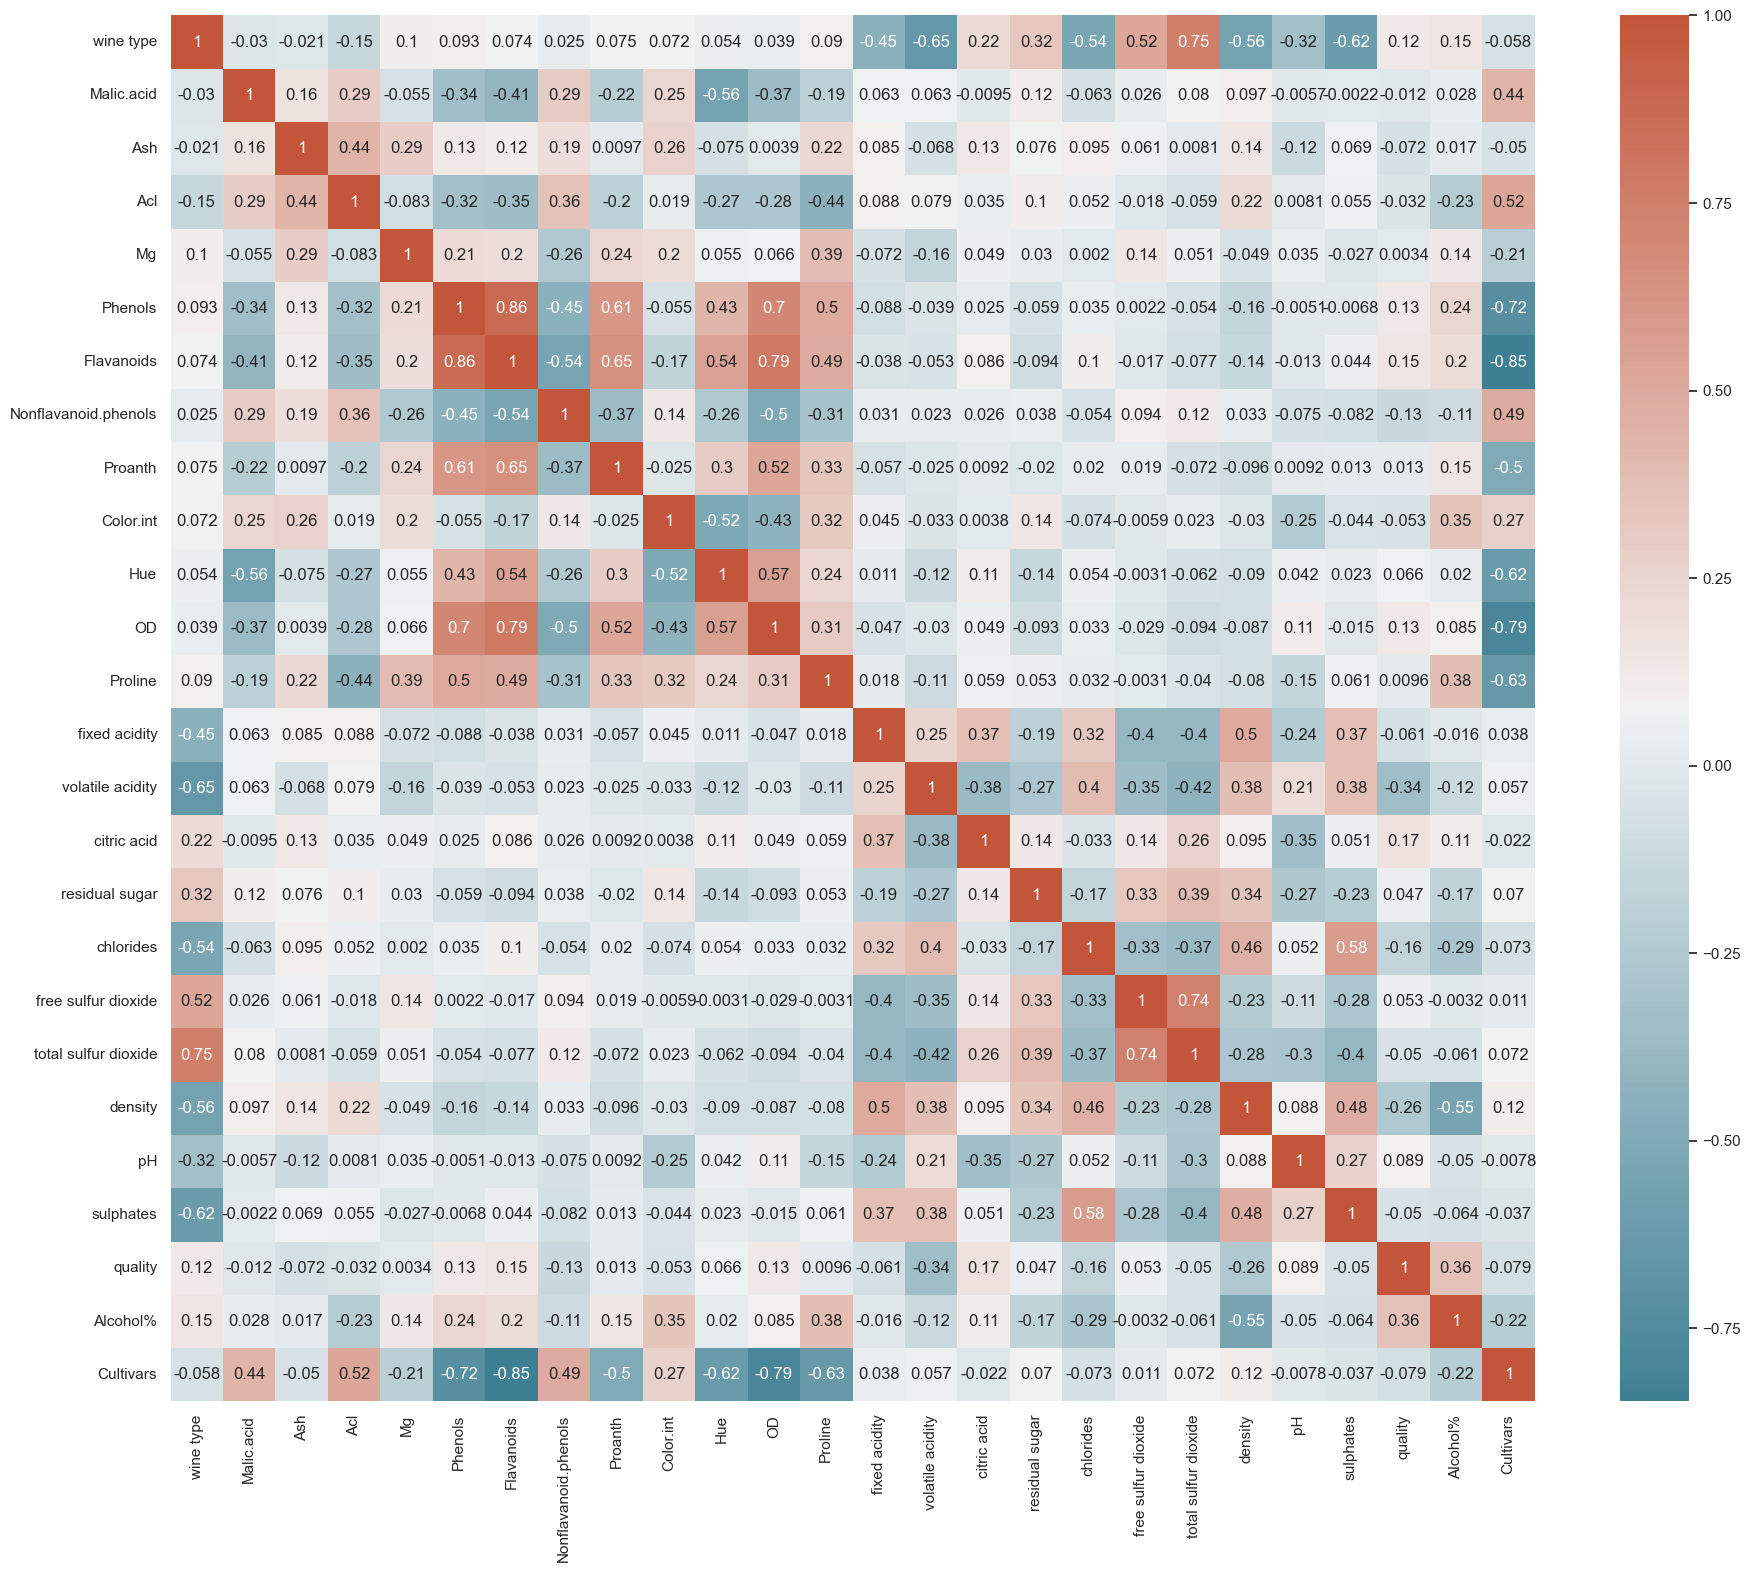

In [46]:
#Describe correlation between Wine type and Customer Segment
corrm = pd.concat([newData['wine type'], newData['Alcohol%'], newData['Cultivars']], axis = 1)
#corr = corrm.corr()
corr = newData.corr()
plt.subplots(figsize=(22,18))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

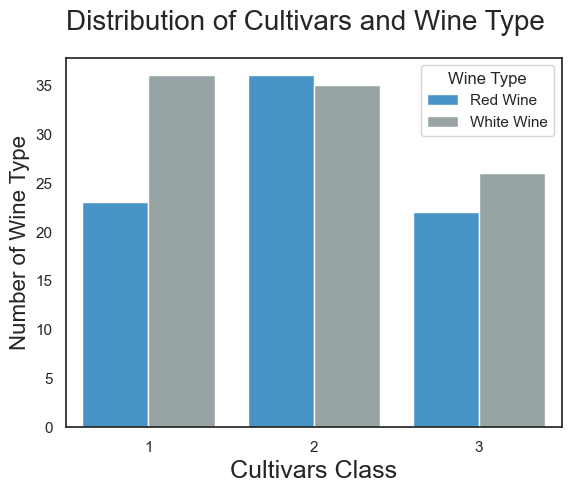

In [47]:
# Then graph the distribution so we see how may red vs white bottles we have

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle("Distribution of Cultivars and Wine Type", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)

ax = sns.countplot(
    x="Cultivars", hue="wine type", data=newData, palette=["#3498db", "#95a5a6"]
)
ax.set(xlabel="Cultivars Class", ylabel="Number of Wine Type")
ax.legend(title = "Wine Type", labels = ["Red Wine", "White Wine"])

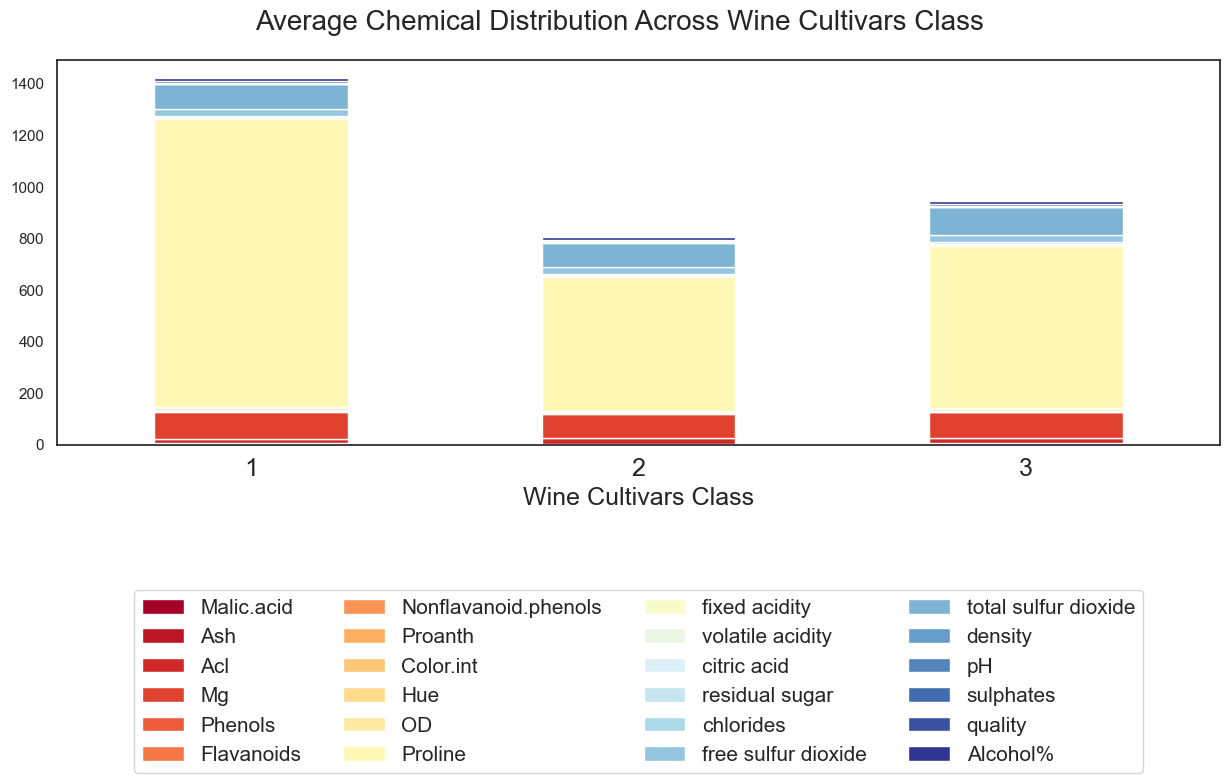

In [48]:
#To see average chemical distribution across both red wine and white wine
#from matplotlib.colors import LinearSegmentedColormap
#colors = sns.color_palette("cubehelix", n_colors=len(newData.columns)-2)
#cmap = LinearSegmentedColormap.from_list("my_colormap", colors)
newDataBC = newData.drop(columns=['wine type'], inplace = False)

newDataBC.groupby(["Cultivars"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "sans-serif"
plt.suptitle(
    "Average Chemical Distribution Across Wine Cultivars Class", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Wine Cultivars Class", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.88), ncol=4, fontsize=15)